# Census Income project

# Project Description

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:


1.	A single cell estimate of the population 16+ for each state.


2.	Controls for Hispanic Origin by age and sex.


3.	Controls by Race, age and sex.


We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import scipy

# Importing Dataset

In [2]:
df=pd.read_csv('Census Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [575]:
df.shape

(32560, 15)

This dataset contains 32560 rows and 15 columns

In [576]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


Top 10 rows of the dataset

In [577]:
df.tail(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32550,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32551,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32552,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32553,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32554,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Last 10 rows of the dataset

In [3]:
df.sample(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32354,45,Self-emp-not-inc,204405,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,20,United-States,<=50K
2601,45,State-gov,37672,Assoc-voc,11,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
17622,43,Private,183765,Some-college,10,Divorced,Tech-support,Not-in-family,White,Male,0,0,40,?,>50K
21704,35,Private,285102,Masters,14,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Female,0,0,40,Taiwan,>50K
16332,50,Private,220019,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,<=50K
2923,40,Private,220460,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Canada,<=50K
30629,53,Private,133219,HS-grad,9,Married-civ-spouse,Other-service,Husband,Black,Male,4386,0,30,United-States,>50K
19827,79,Private,172220,7th-8th,4,Widowed,Priv-house-serv,Not-in-family,White,Female,2964,0,30,United-States,<=50K
21304,18,Private,414721,11th,7,Never-married,Other-service,Own-child,Black,Male,0,1602,23,United-States,<=50K
20455,36,Self-emp-not-inc,36270,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,1977,65,United-States,>50K


# Dropping unwanted data 

In [578]:
#Checking the value count of Capital_loss column
df["Capital_loss"].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [579]:
(29760/32560*100)

91.4004914004914

In this perticular Capital_loss column there are 92% zero values so we will drop this column. because it is not playing an imp. role 

In [580]:
#Droping Capital_gain column
df = df.drop(["Capital_loss"],axis=1)

In [581]:
#Checking the value count of Capital_loss column
df["Capital_gain"].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [582]:
(29849/32560*100)

91.67383292383292

In this perticular Capital_gain column there are 92% zero values so we will drop this column. it is not playing an imp. role. 

In [583]:
#Droping Capital_gain column
df = df.drop(["Capital_gain"],axis=1)

# Exploratory Data Analysis[EDA]

In [584]:
df.columns.to_list()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Hours_per_week',
 'Native_country',
 'Income']

List of all the columns present in the dataset

# Checking for duplicate values

In [585]:
df.duplicated().sum()

26

As we can see here that duplicate values are present in the dataset.

### Removing duplicate values from the dataset

In [586]:
df = df.drop_duplicates()

All the duplicate values are droped from the dataset

### Again check for duplicate value

In [587]:
df.duplicated().sum()

0

As we can see here that all the duplicated values are removed from the dataset

# Checking for white space 

In [588]:
# Check for white spaces
has_white_spaces = ' ' in df
print(has_white_spaces)

False


As we can see here that no white space is present in the dataset.

# Checking for the prescence of various symbol 

In [589]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

Here we can see that symbol '?' is present in columns['workclass', 'occupation', 'native_country'] and we have to treat it 

Since this columns are categorical columns we will use mode method to remove the '?' symbol from the data  

In [590]:
df["Workclass"].mode() 

0     Private
Name: Workclass, dtype: object

mode of 'workclass' column is private

In [591]:
df["Occupation"].mode()

0     Prof-specialty
Name: Occupation, dtype: object

Mode of 'Occupation' column is Prof-specialty

In [592]:
df["Native_country"].mode() 

0     United-States
Name: Native_country, dtype: object

Mode of 'Native_country' is United-States

In [593]:
df['Workclass'] = df.Workclass.str.replace('?', 'Private')
df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')
df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [594]:
df.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

As we can see here that symbol '?' removed from the data

In [595]:
df.isin(['@']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

 symbol '@' is not present in the dataset

In [596]:
df.isin(['#']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Symbol '#' is not present in the dataset

# Checking for the various data types present in the dataset

In [597]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

This dataset contains two types of dataset ['int64', 'object']

# Checking for the null values

In [598]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We can say that no null values are present in the dataset

<AxesSubplot:>

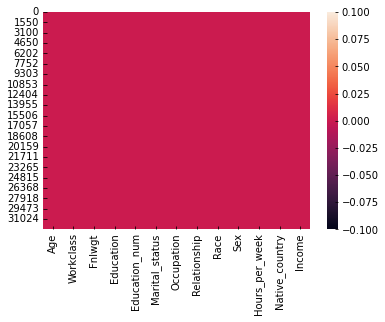

In [599]:
#heatmap visualization for null values
sns.heatmap(df.isnull())

After visualization with heatmap we can say that there are no null values present in the dataset.

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32534 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32534 non-null  int64 
 1   Workclass       32534 non-null  object
 2   Fnlwgt          32534 non-null  int64 
 3   Education       32534 non-null  object
 4   Education_num   32534 non-null  int64 
 5   Marital_status  32534 non-null  object
 6   Occupation      32534 non-null  object
 7   Relationship    32534 non-null  object
 8   Race            32534 non-null  object
 9   Sex             32534 non-null  object
 10  Hours_per_week  32534 non-null  int64 
 11  Native_country  32534 non-null  object
 12  Income          32534 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.5+ MB


It is showing a general information about the dataset like name of the columns present in the dataset total non null values present in the dataset types of data present in the dataset memory occupied by the dataset.

In [601]:
#Checking unique values of each column
df.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

Here we can see count for unique values present in each columns in the dataset

# checking for Unique values present in the target column

In [602]:
#Checking number of unique values in target column
df['Income'].nunique()

2

In [603]:
#Checking unique values of target column
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

There are only two unique counts in the target column so it's a binary classification problem.

In [604]:
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32534.000000,3.253400e+04,32534.000000,32534.000000
mean,38.586433,1.897854e+05,10.081761,40.441108
std,13.638097,1.055592e+05,2.571694,12.346714
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178285e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.369938e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


### Observation

1. count for each of the columns is same which means that there are no nul values present in the dataset.


2. Mean is greater than median which means that skewness is present in the dataset, and the data is skewed to the right.


3. There is a huge difference between 75th percentile and max values so we can say that outliers are present in the dataset.


4. We can also observe std., min., 25th, 50th, 75th, and max values for each of the columns 

# Seprating categorical column & Numerical column

#### categorical columns

In [605]:
# Separating categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


#### Numerical columns

In [606]:
# Separating numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)


['Age', 'Fnlwgt', 'Education_num', 'Hours_per_week']


# Data Visualization

## Univarient Analysis 

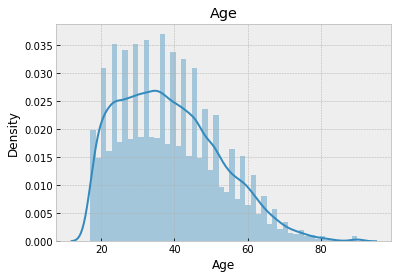

In [607]:
sns.distplot(df['Age'])
plt.title('Age')
plt.show()

Distribution of Age column which is showing maximum value in range between 20 to 60 

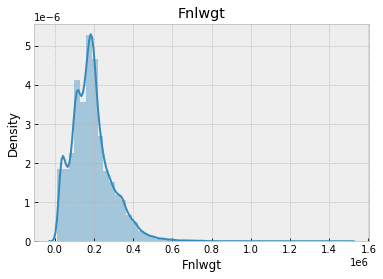

In [608]:
sns.distplot(df['Fnlwgt'])
plt.title('Fnlwgt')
plt.show()

Distribution of Fnlwgt (final weight) column which is showing maximum value at 0.2

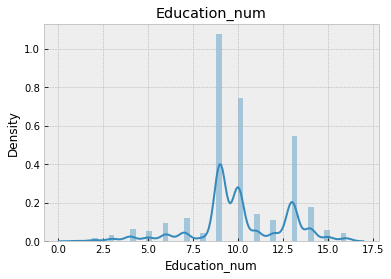

In [609]:
sns.distplot(df['Education_num'])
plt.title('Education_num')
plt.show()

Distribution of Education_num column 

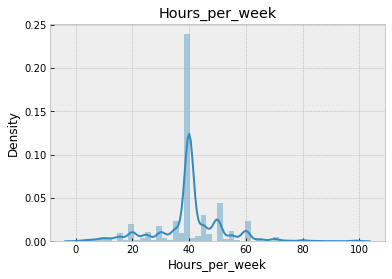

In [611]:
sns.distplot(df['Hours_per_week'])
plt.title('Hours_per_week')
plt.show()

Distribution of Hours_per_week column with max value range between 40-50 

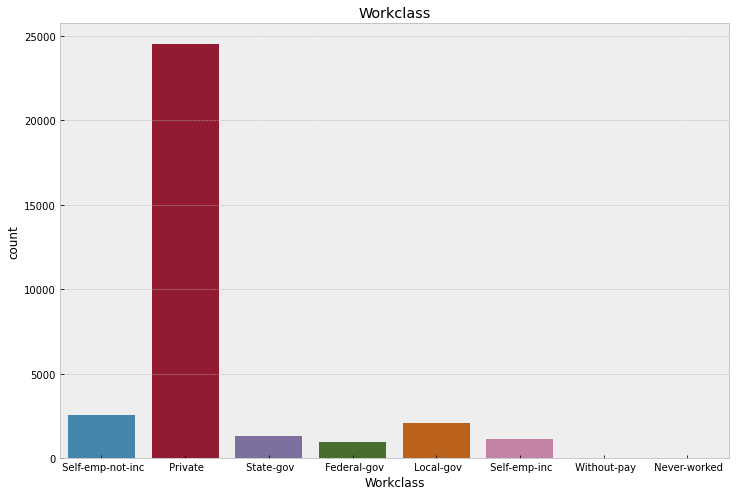

Workclass
 Private             24507
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
dtype: int64

In [612]:
plt.figure(figsize=(12,8))
sns.countplot(df['Workclass'])
plt.title('Workclass')
plt.show()

df.value_counts('Workclass')

In workclass column private sector is contributing highest and never work and without pay contributing lowest 

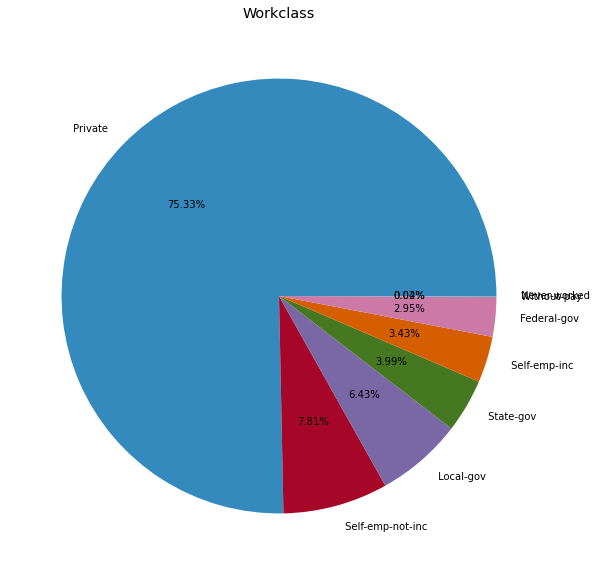

In [613]:
plt.figure(figsize=(15,10))
plt.pie(df['Workclass'].value_counts().values,labels=df['Workclass'].value_counts().index,autopct='%1.2f%%')
plt.title('Workclass')
plt.show()

Here we can see the pie chart distribution of workclass columns and private sector has highest contribution with 75.33%

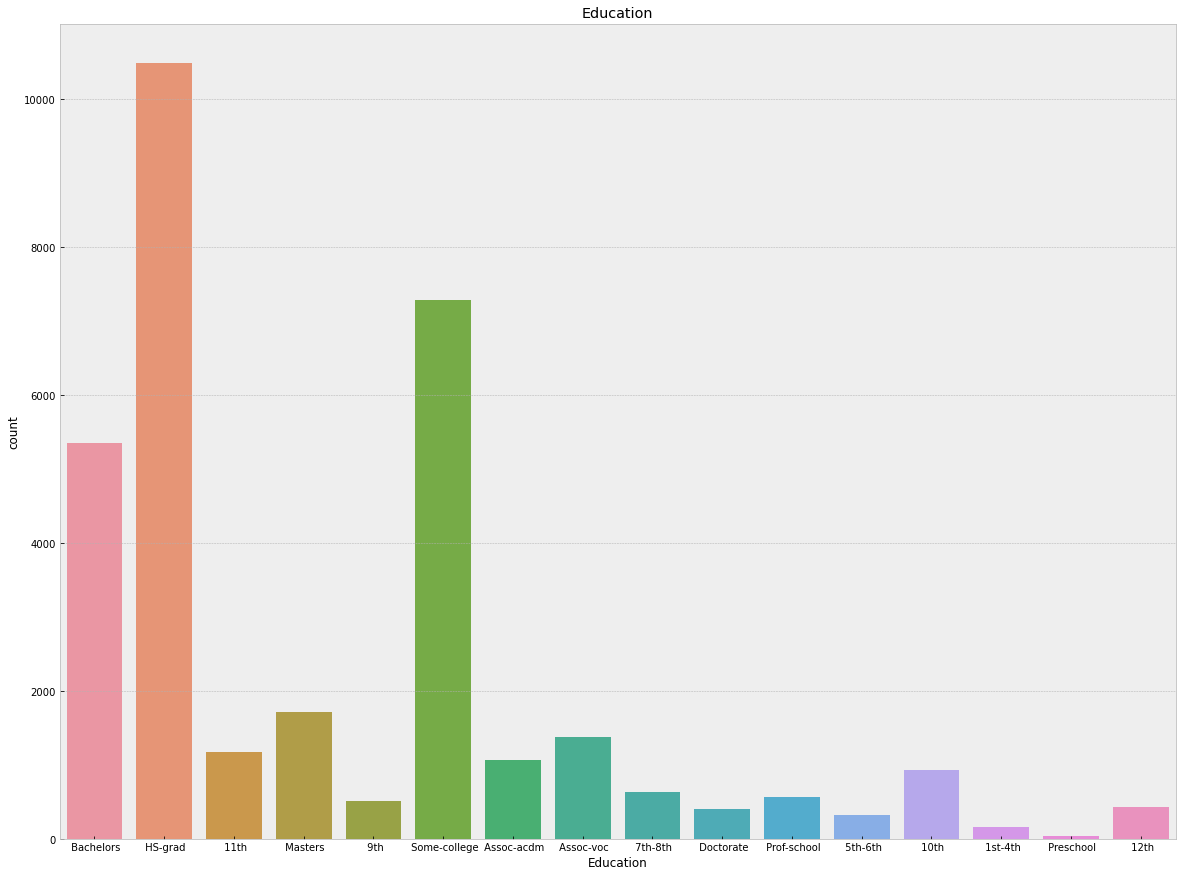

Education
 HS-grad         10493
 Some-college     7281
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
dtype: int64

In [614]:
plt.figure(figsize=(20,15))
sns.countplot(df['Education'])
plt.title('Education')
plt.show()

df.value_counts('Education')

In education column Hs-grad value is highest and preschool value is lowest 

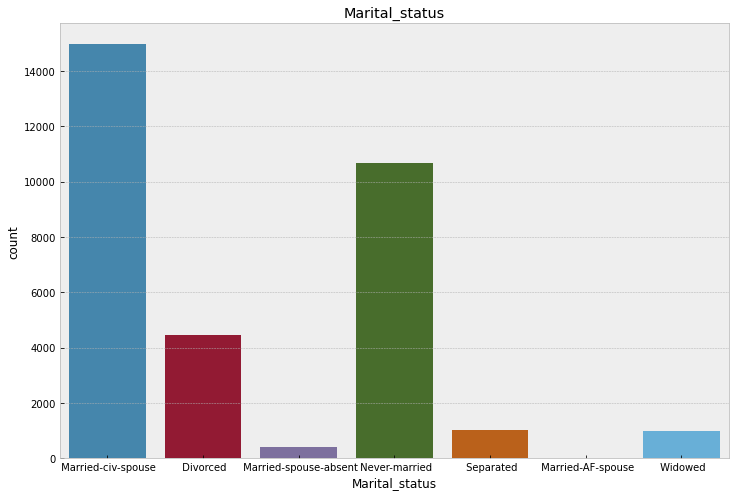

Marital_status
 Married-civ-spouse       14969
 Never-married            10665
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
dtype: int64

In [615]:
plt.figure(figsize=(12,8))
sns.countplot(df['Marital_status'])
plt.title('Marital_status')
plt.show()

df.value_counts('Marital_status')

In marital_status column Married-civ-spouse has highest value and Married-AF-spouse has lowest value

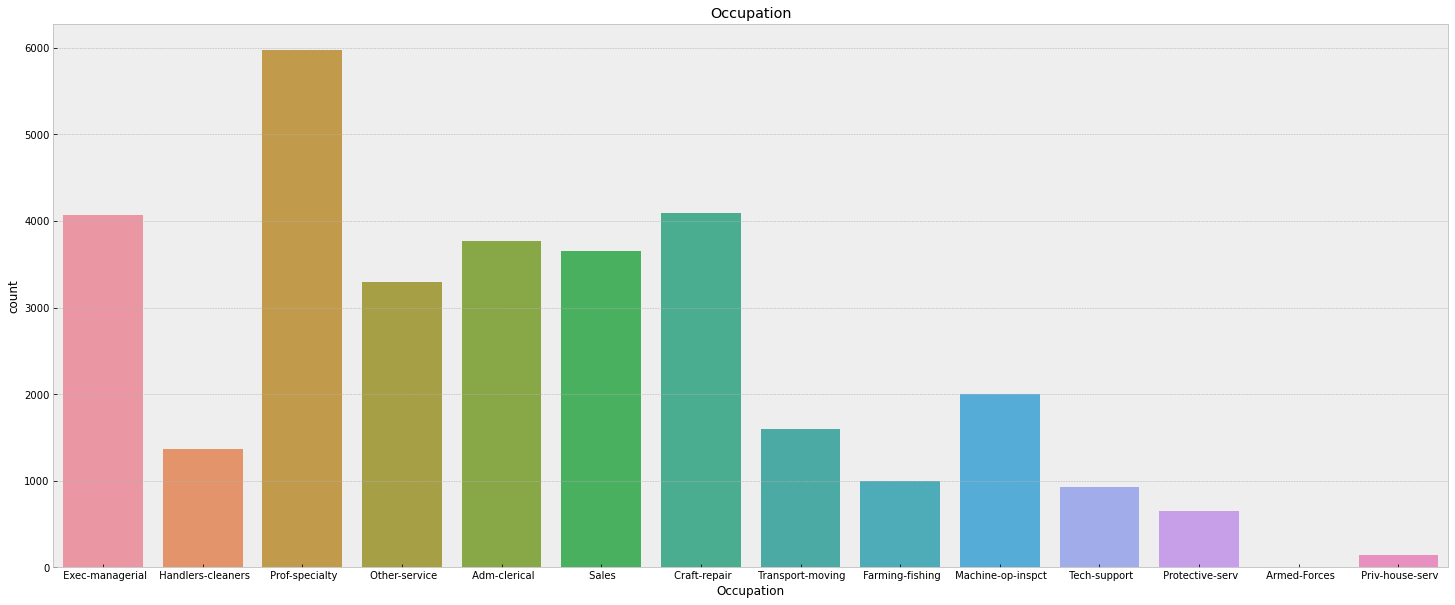

Occupation
 Prof-specialty       5979
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3290
 Machine-op-inspct    1999
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
dtype: int64

In [616]:
plt.figure(figsize=(25,10))
sns.countplot(df['Occupation'])
plt.title('Occupation')
plt.show()


df.value_counts('Occupation')

In occupation column Prof-specialty has highest value and Armed-Forces has lowest value.

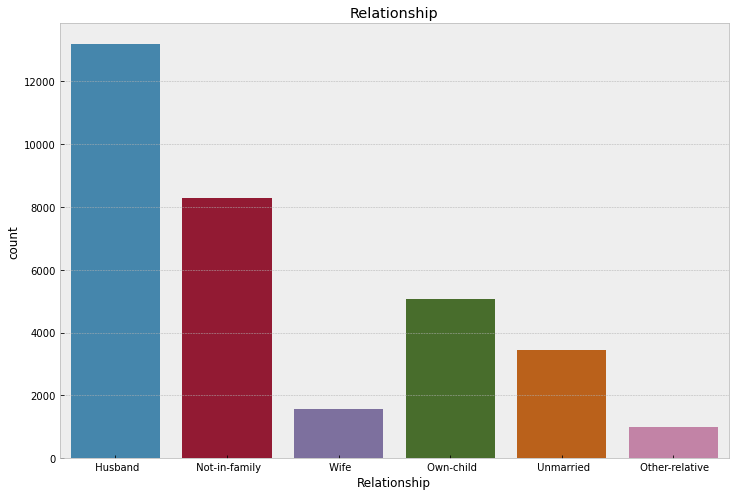

Relationship
 Husband           13186
 Not-in-family      8291
 Own-child          5063
 Unmarried          3445
 Wife               1568
 Other-relative      981
dtype: int64

In [617]:
plt.figure(figsize=(12,8))
sns.countplot(df['Relationship'])
plt.title('Relationship')
plt.show()



df.value_counts('Relationship')

In Relationship column husband has highest value and Other-relative has lowest value.

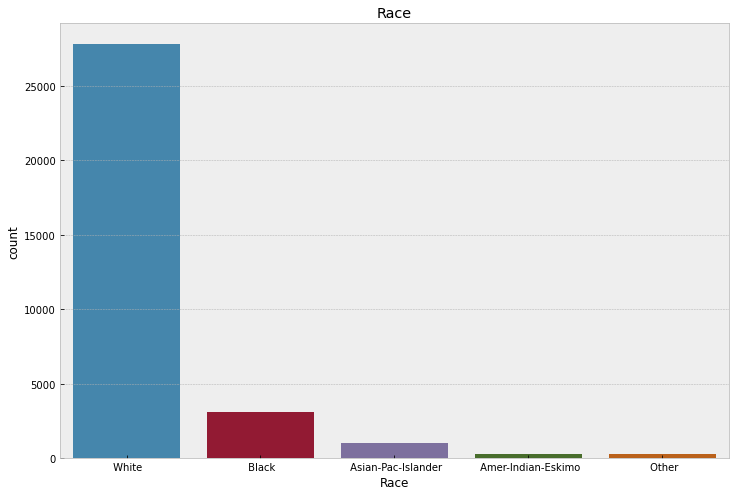

Race
 White                 27792
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
dtype: int64

In [618]:
plt.figure(figsize=(12,8))
sns.countplot(df['Race'])
plt.title('Race')
plt.show()



df.value_counts('Race')

In Race column white has highest value and other has lowest value.

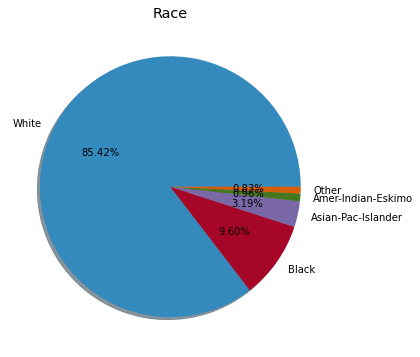

In [619]:
labels='White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other'
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(df['Race'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,)
plt.title('Race')
plt.show()

White has highest value with 85.43% in Race column

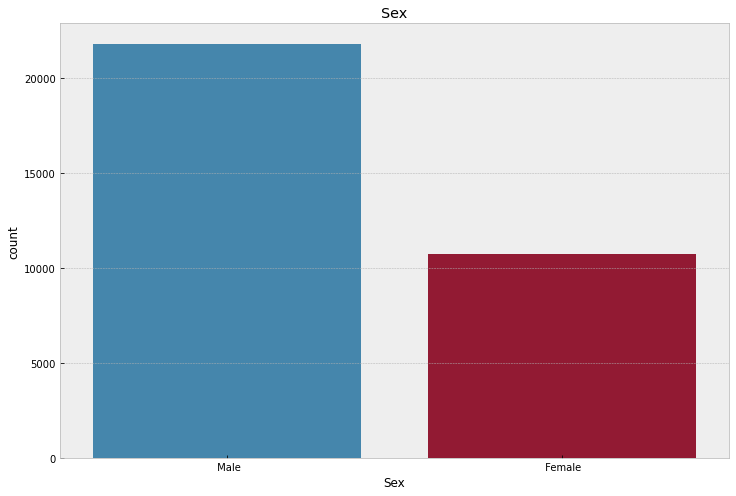

Sex
 Male      21773
 Female    10761
dtype: int64

In [620]:
plt.figure(figsize=(12,8))
sns.countplot(df['Sex'])
plt.title('Sex')
plt.show()


df.value_counts('Sex')

In sex column male has highest value and female has lowest value.

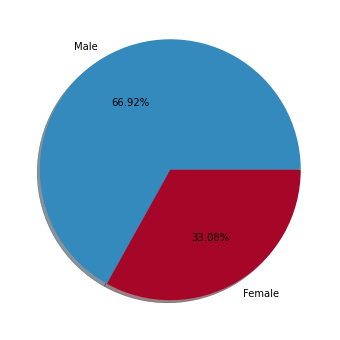

In [621]:
labels='Male','Female'
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(df['Sex'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,)
plt.show()

Male has high value with  66.92% and Female has 33.08% in Sex column

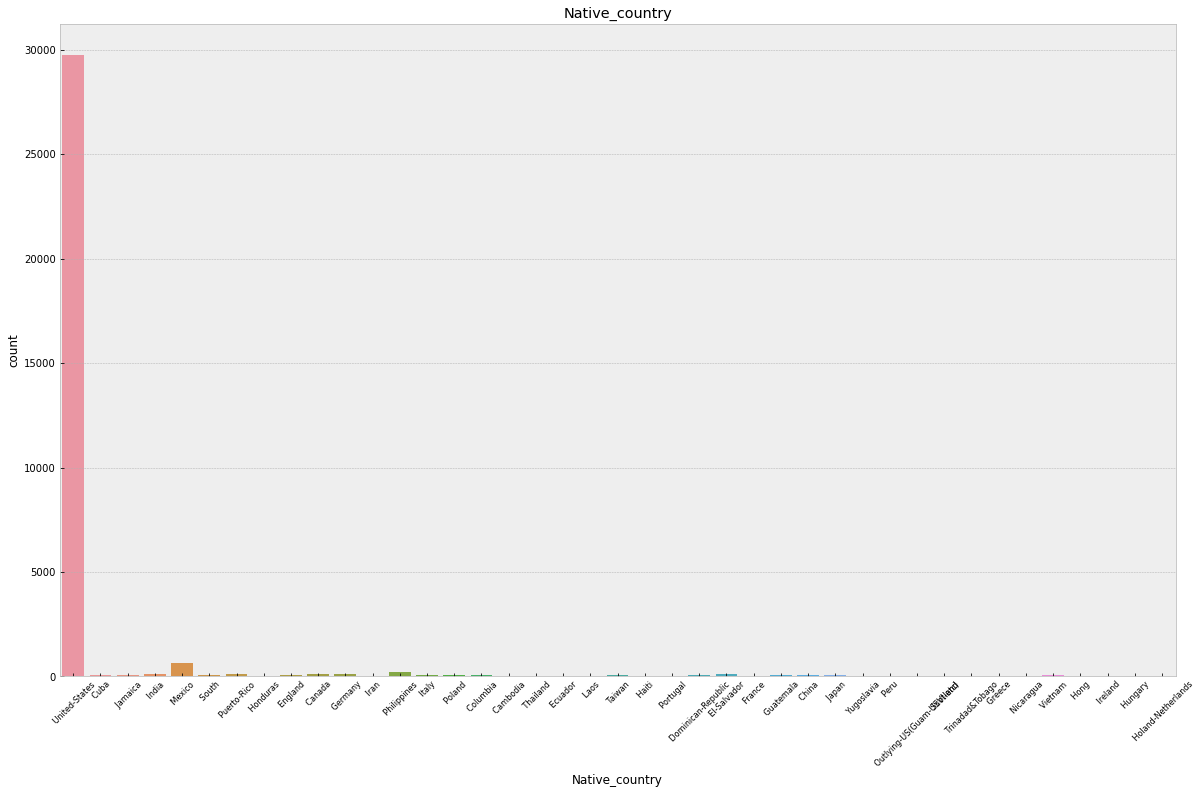

Native_country
 United-States                 29732
 Mexico                          639
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        62
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                

In [622]:
plt.figure(figsize=(20,12))
sns.countplot(df['Native_country'])
plt.xticks(rotation=45, fontsize=8)
plt.title('Native_country')
plt.show()


df.value_counts('Native_country')

 In Native_country column United-States has highest value and Holand-Netherlands has lowest value.

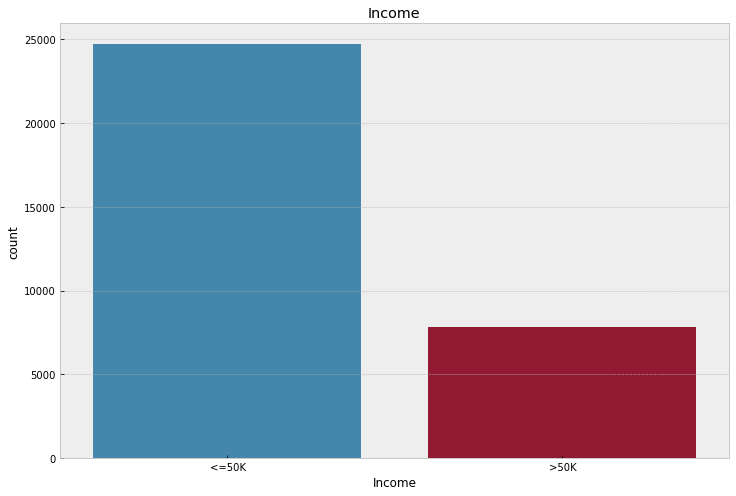

Income
 <=50K    24695
 >50K      7839
dtype: int64

In [623]:
plt.figure(figsize=(12,8))
sns.countplot(df['Income'])
plt.title('Income')
plt.show()


df.value_counts('Income')

In Income column people who earn less than equal to 50k is higher than people who earn greater than 50k 

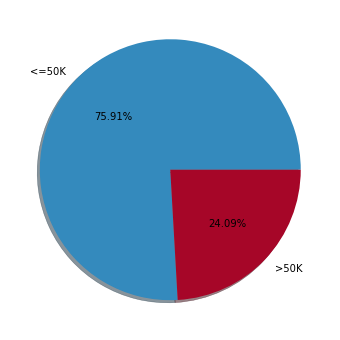

In [624]:
labels='<=50K','>50K'
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(df['Income'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,)
plt.show()

people with earning lesss than or equals to 50k are higher with 75.91% and people who earn greater than 50k are 24.09% 

# Bivarient Analysis 

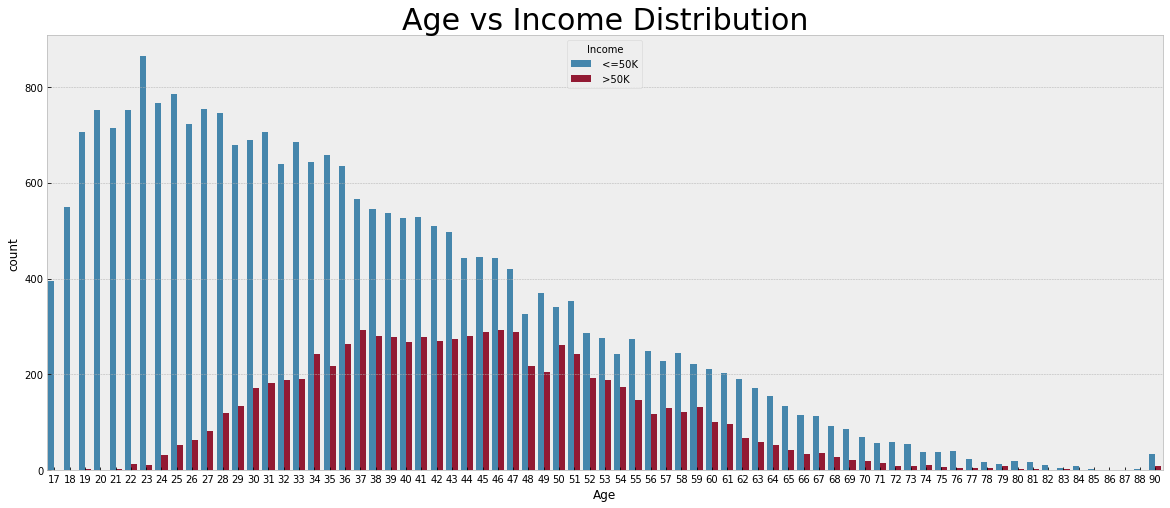

In [625]:
plt.figure(figsize=(20,8))
sns.countplot(df['Age'],hue=df['Income'])
plt.title('Age vs Income Distribution',fontdict={'fontsize':30})
plt.show()

 More Peoples between 36 years to 47 years have earned more than 50K
    
    
 Peoples started to earn at age 17, from 17 to 41 majority earn below 50k

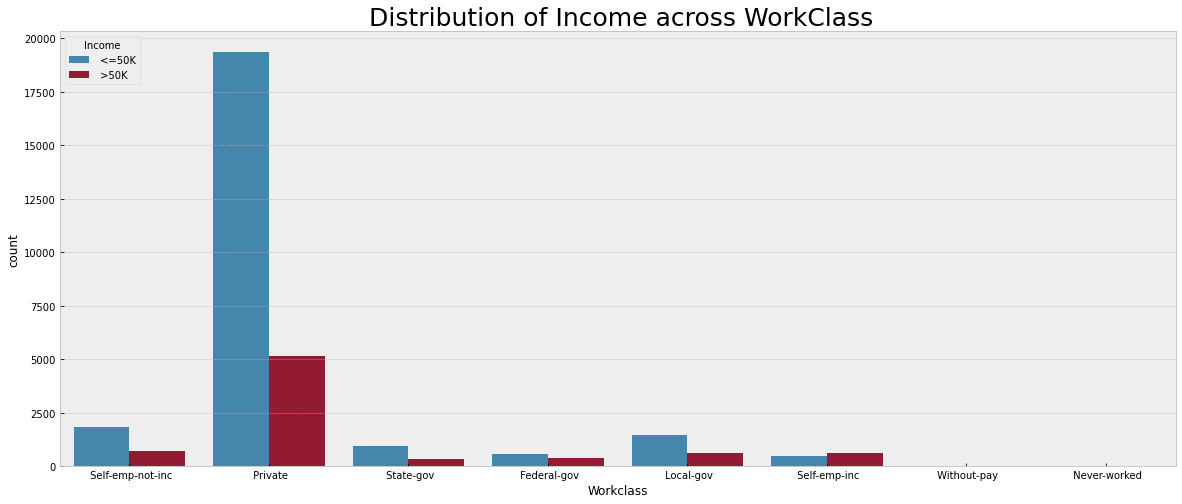

In [626]:
plt.figure(figsize=(20,8))
sns.countplot(df['Workclass'],hue='Income', data=df)
plt.title(' Distribution of Income across WorkClass',fontdict={'fontsize':25})
plt.show()

In every work class, most people are geeting income <50k, However self emploid peoples are able to earn more than >50k

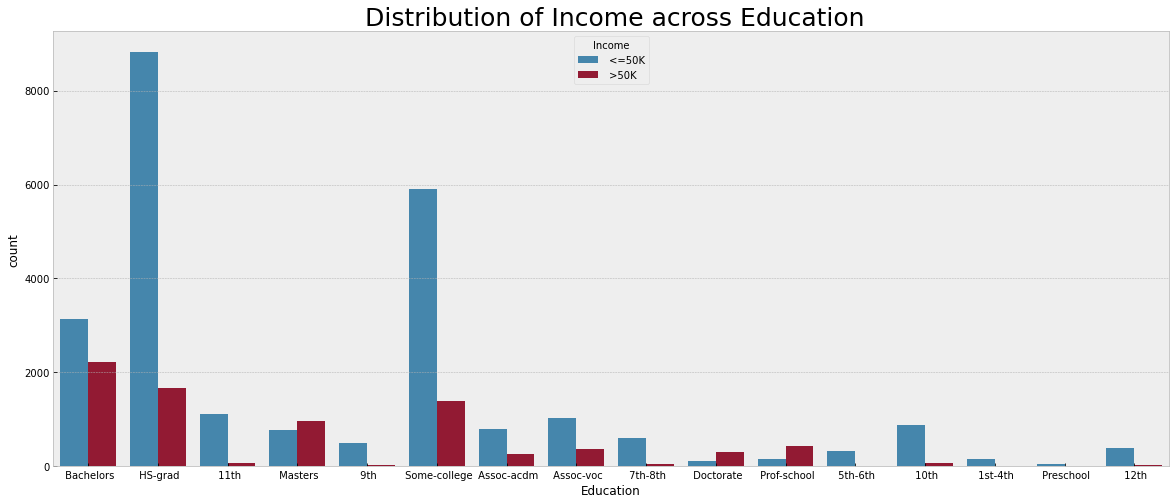

In [627]:
plt.figure(figsize=(20,8))
sns.countplot(df['Education'],hue='Income', data=df)
plt.title(' Distribution of Income across Education',fontdict={'fontsize':25})
plt.show()

 More persons in Doctorate and Prof-School qualified persons got more than >50K & others has earn <=50k.

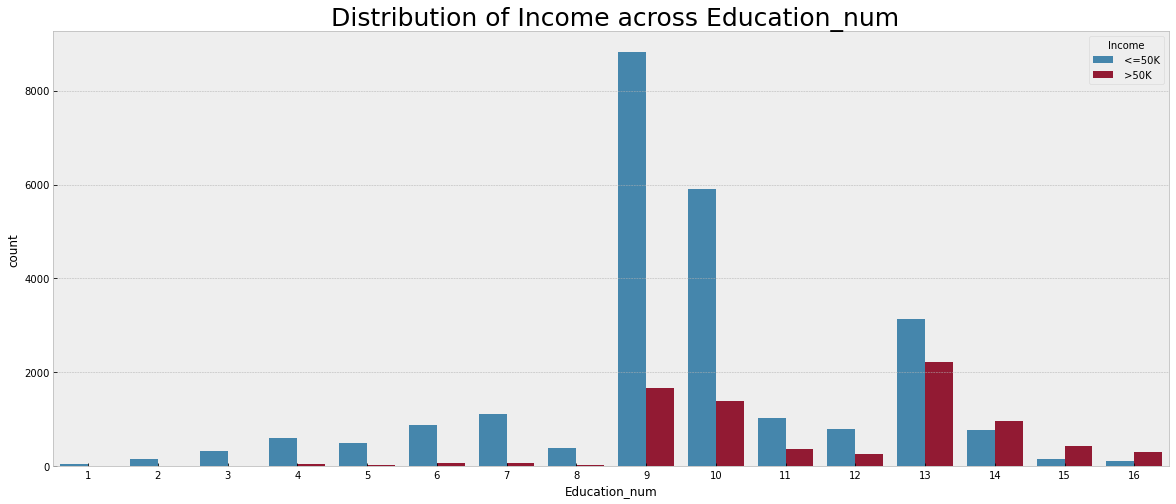

In [628]:
plt.figure(figsize=(20,8))
sns.countplot(df['Education_num'],hue='Income', data=df)
plt.title(' Distribution of Income across Education_num',fontdict={'fontsize':25})
plt.show()

In Education_num column number 14,15,16 has earn more than 50k and rest of the number has earn <=50k

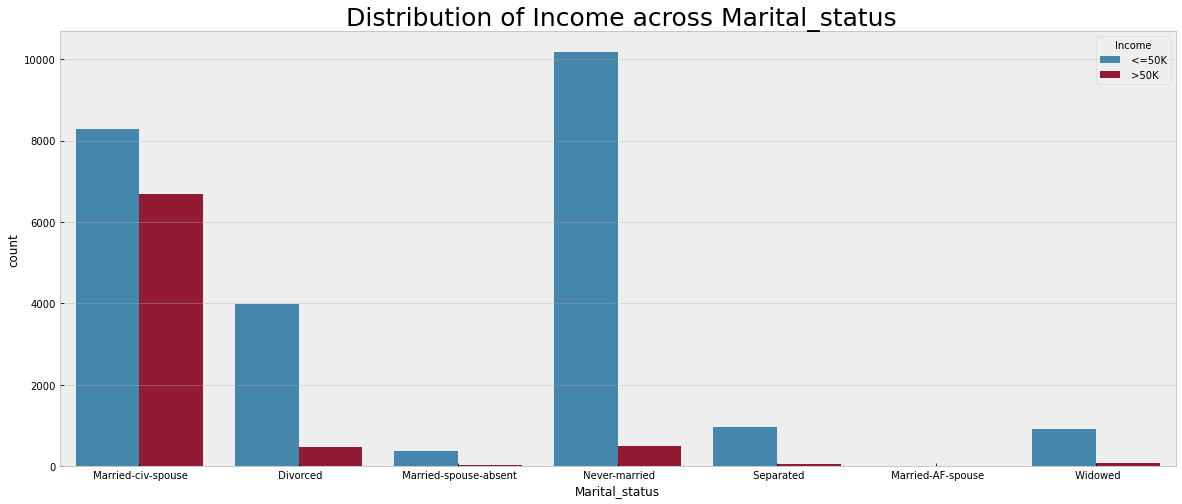

In [629]:
plt.figure(figsize=(20,8))
sns.countplot(df['Marital_status'],hue='Income', data=df)
plt.title(' Distribution of Income across Marital_status',fontdict={'fontsize':25})
plt.show()

In Marital_status columns in every case scenerio <=50k is higer than >50k

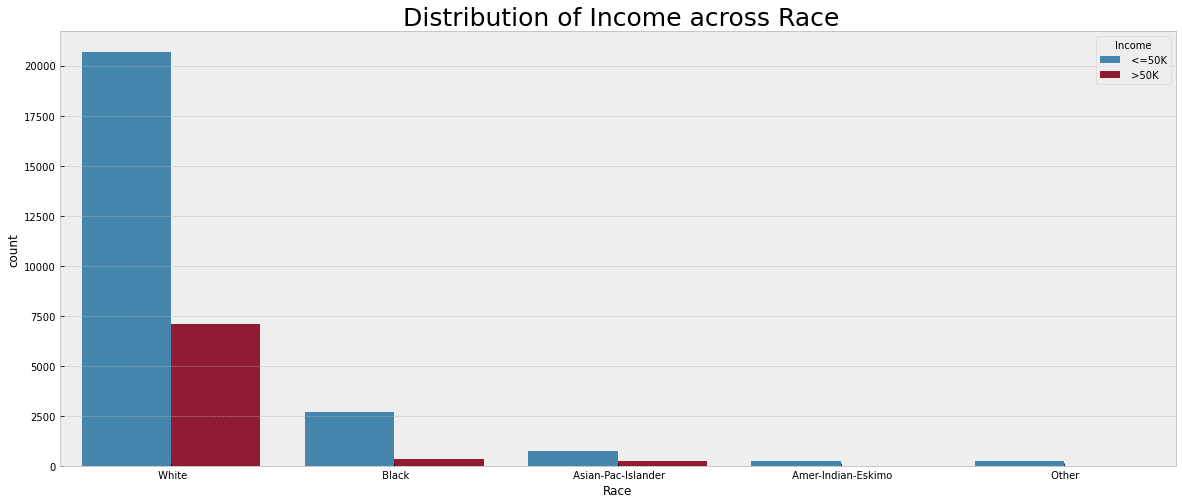

In [630]:
plt.figure(figsize=(20,8))
sns.countplot(df['Race'],hue='Income', data=df)
plt.title(' Distribution of Income across Race',fontdict={'fontsize':25})
plt.show()

In column Race <=50k is higher than >50k 

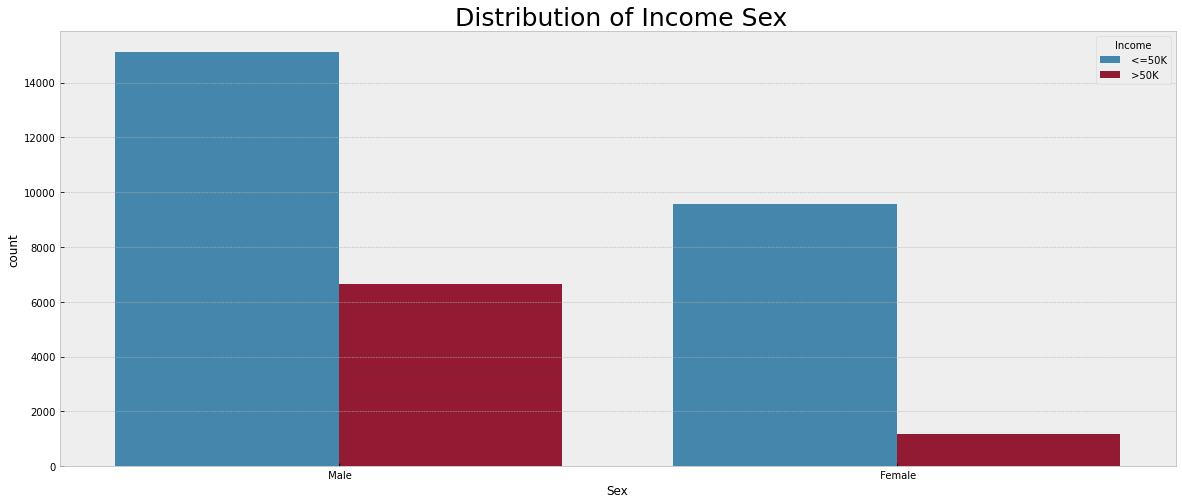

In [631]:
plt.figure(figsize=(20,8))
sns.countplot(df['Sex'],hue='Income', data=df)
plt.title(' Distribution of Income Sex',fontdict={'fontsize':25})
plt.show()

In column sex in both male and female income which is <=50k is higer 

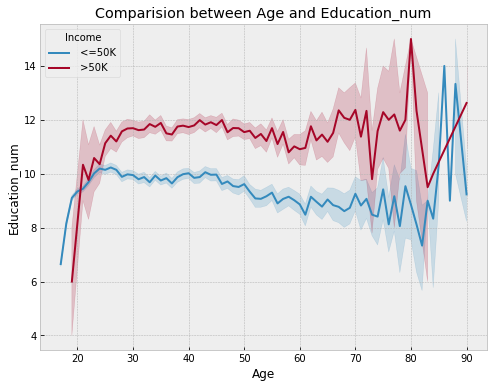

In [632]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and Education_num')
sns.lineplot(df['Age'],df['Education_num'],hue=df["Income"])
plt.show()

It looks very clear that as the education number is increasing chance of getting income >5ok is also increasing.And also as age is more means experience is more the chance of getting income more than 50k is also more.

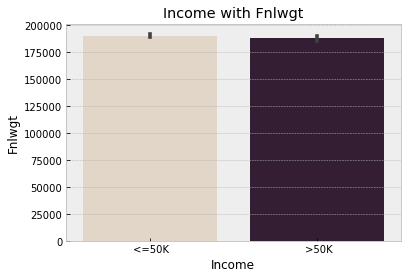

In [633]:
# Checking income with Fnlwgt
sns.barplot(x='Income',y='Fnlwgt',data=df,palette='ch:.25')
plt.title('Income with Fnlwgt')
plt.show()

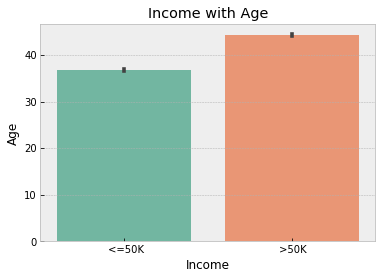

In [634]:
# Checking income with Capital_gain
sns.barplot(x='Income',y='Age',data=df,palette='Set2')
plt.title('Income with Age')
plt.show()

with increse in age income is also increasing 

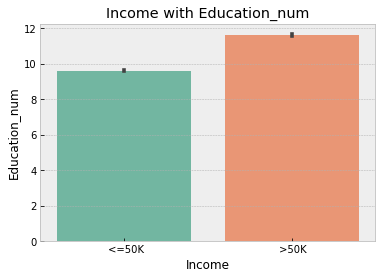

In [635]:
# Checking income with Capital_loss
sns.barplot(x='Income',y='Education_num',data=df,palette='Set2')
plt.title('Income with Education_num')
plt.show()

People with higher education_nun has income more than >50k

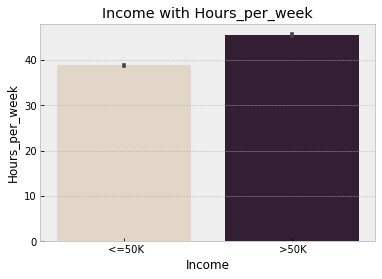

In [636]:
# Checking income with Hours_per_week
sns.barplot(x='Income',y='Hours_per_week',data=df,palette='ch:.25')
plt.title('Income with Hours_per_week')
plt.show()

with increase in hours per week income is also increasing 

# Multivarient Analysis 

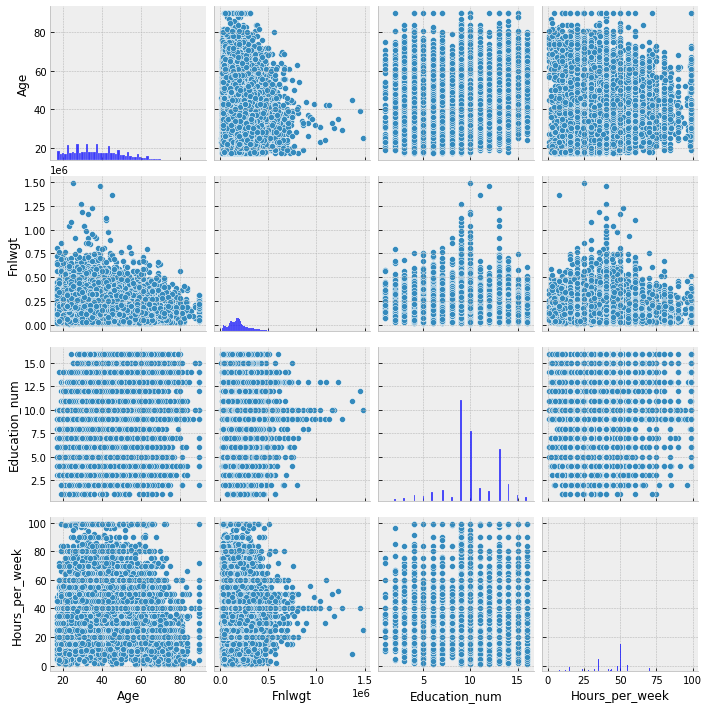

In [637]:
sns.pairplot(df)
plt.show()

Here we can see the pairplot of the whole dataset.

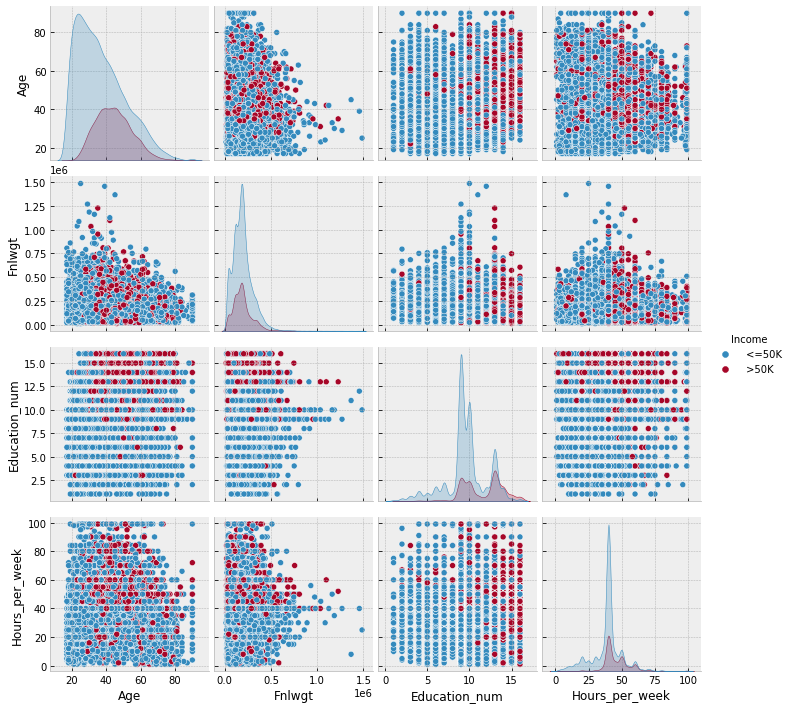

In [638]:
sns.pairplot(df, hue='Income')
plt.show()

Here we can se the pairplot for the whole dataset with hue='Income' 

# Checking for outliers

We never check prescence of outliers from categorical columns and target variables & to check the prescence of outliers we use boxplot visualization.

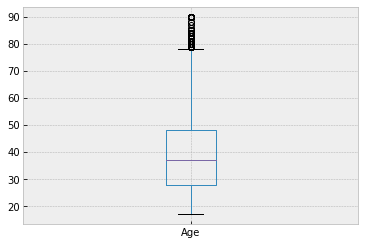

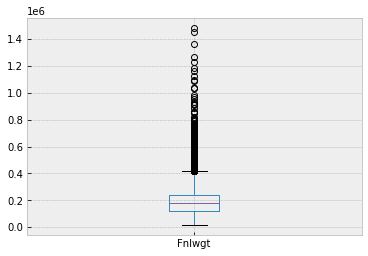

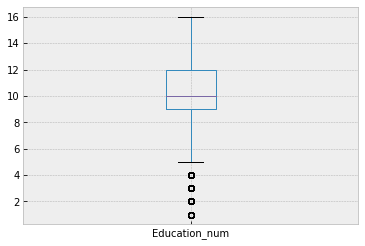

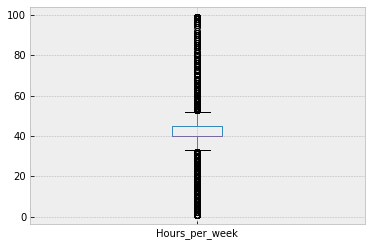

In [639]:
for i in numerical_columns:
    df.boxplot(i)
    plt.show()

By visualizing with boxplot we can say that outliers are present in the dataset & we have to remove the outlies from the dataset

# Removing outliers

In [640]:
#Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df[numerical_columns]))

z

,Age,Fnlwgt,Education_num,Hours_per_week
0,0.836901,1.008685,1.134771,2.222577
1,0.043000,0.244991,0.420648,0.035727
2,1.056877,0.425698,1.198357,0.035727
3,0.776252,1.407986,1.134771,0.035727
4,0.116325,0.898056,1.523626,0.035727
...,...,...,...,...
32555,0.849577,0.639619,0.745917,0.197716
32556,0.103650,0.335469,0.420648,0.035727
32557,1.423503,0.358812,0.420648,0.035727
32558,1.216203,0.110884,0.420648,1.655616


In [641]:
#threshold value =3
threshold=3

print(np.where(z>3))

(array([    9,    27,    36, ..., 32498, 32498, 32504], dtype=int64), array([3, 3, 1, ..., 0, 3, 3], dtype=int64))


In [642]:
df_new=df[(z<3).all(axis=1)]

df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [643]:
df_new.shape

(31440, 13)

In [644]:
df.shape

(32534, 13)

In [645]:
#Checking dataloss
Dataloss = (((32536-29808)/32536)*100)
Dataloss

8.384558642734202

As we can see here that dataloss percentage is less than 10% so we can further proceed with the data.

In [646]:
df=df_new

In [647]:
df.shape

(31440, 13)

# Check for skewness

In [648]:
df.skew()

Age               0.472223
Fnlwgt            0.635737
Education_num    -0.159346
Hours_per_week   -0.340669
dtype: float64

Accpetable range for skewness is -0.5 to +0.5 and according to this we can say that skewness is not present in the dataset. we never remove skewness from target column and categorical columns.

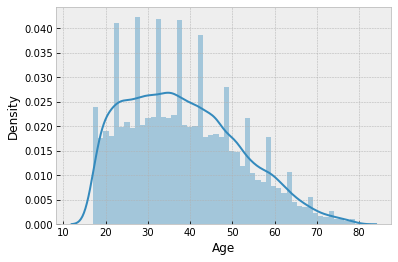

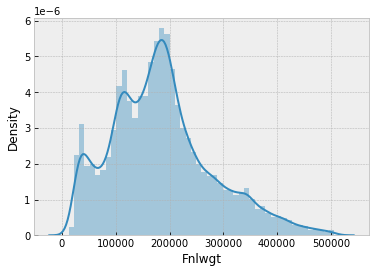

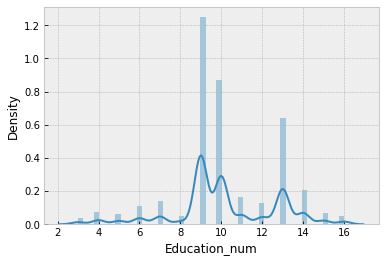

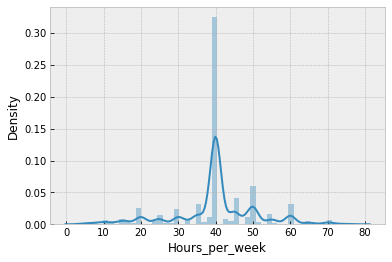

In [662]:
for i in numerical_columns:
    sns.distplot(df[i])
    plt.show()

By visualizing with displot we can see that skewness is not present in the dataset.

# Encoding the categorical columns using Label Encoding

In [663]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=lb.fit_transform(df[i].values)

In [664]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,83311,8,13,2,3,0,4,1,13,38,0
1,38,3,215646,10,9,0,5,1,4,1,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,40,38,0
3,28,3,338409,8,13,2,9,5,2,0,40,4,0
4,37,3,284582,11,14,2,3,5,4,0,40,38,0


# Correlation between target variable and independent variables

In [665]:
cor=df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.037965,-0.072984,-0.000228,0.053353,-0.286091,-0.001308,-0.268032,0.030675,0.091650,0.097064,-0.001026,0.248263
Workclass,0.037965,1.000000,-0.020753,0.004607,0.003821,-0.020561,0.007597,-0.056797,0.046292,0.070081,0.030304,-0.001616,0.003509
Fnlwgt,-0.072984,-0.020753,1.000000,-0.024033,-0.035142,0.028426,0.002641,0.006790,-0.011107,0.028976,-0.014802,-0.059368,-0.008028
Education,-0.000228,0.004607,-0.024033,1.000000,0.356011,-0.039243,-0.041210,-0.015251,0.015569,-0.024779,0.061926,0.068106,0.077595
Education_num,0.053353,0.003821,-0.035142,0.356011,1.000000,-0.065667,0.073799,-0.102677,0.030896,0.016800,0.160676,0.054546,0.337713
Marital_status,-0.286091,-0.020561,0.028426,-0.039243,-0.065667,1.000000,0.034469,0.185678,-0.067528,-0.127358,-0.197365,-0.017388,-0.198368
Occupation,-0.001308,0.007597,0.002641,-0.041210,0.073799,0.034469,1.000000,-0.037476,-0.004065,0.047958,-0.019913,-0.003726,0.034469
Relationship,-0.268032,-0.056797,0.006790,-0.015251,-0.102677,0.185678,-0.037476,1.000000,-0.115155,-0.583027,-0.263261,-0.010985,-0.251538
Race,0.030675,0.046292,-0.011107,0.015569,0.030896,-0.067528,-0.004065,-0.115155,1.000000,0.088793,0.045423,0.122124,0.072482
Sex,0.091650,0.070081,0.028976,-0.024779,0.016800,-0.127358,0.047958,-0.583027,0.088793,1.000000,0.238823,0.002136,0.216675


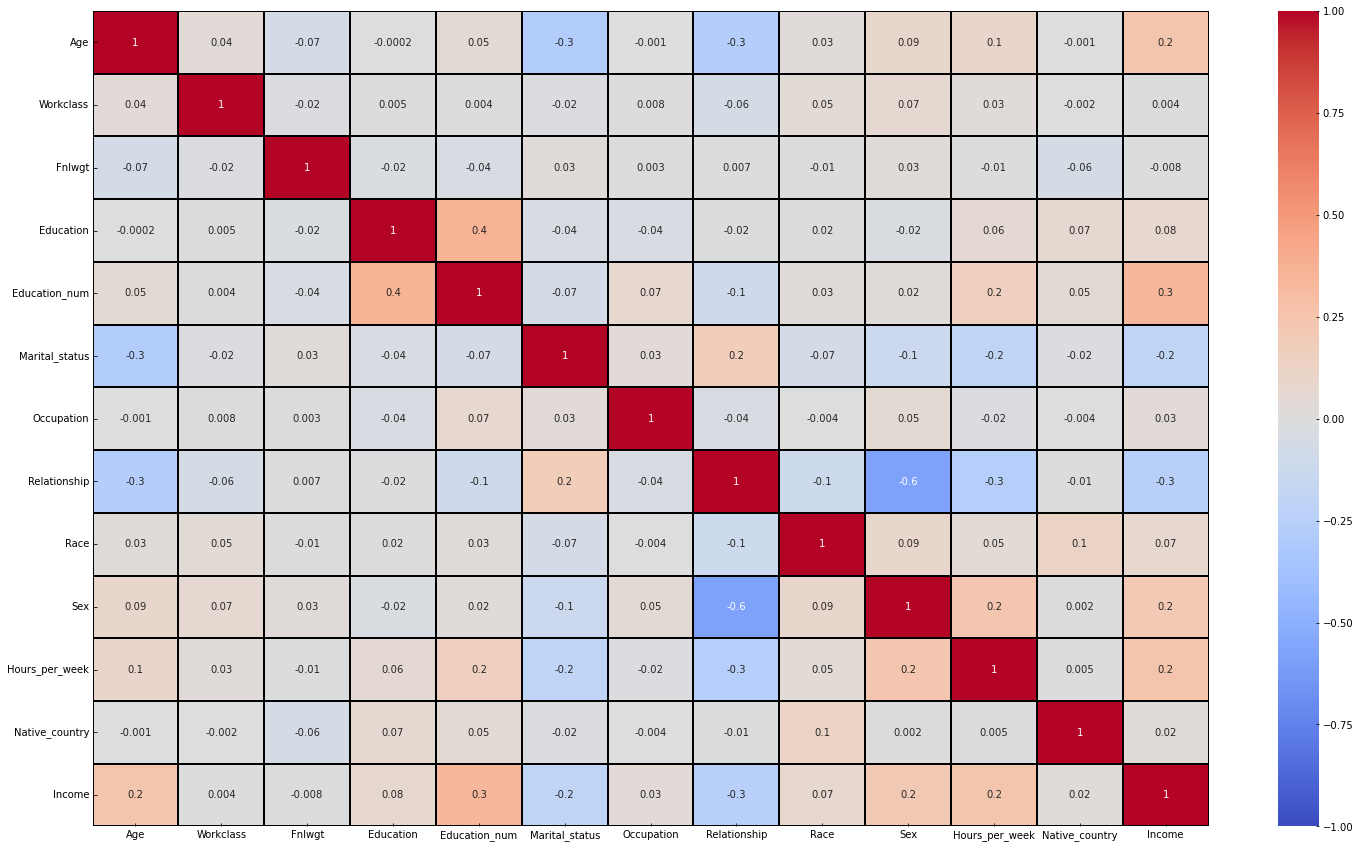

In [668]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

1. Workclass and Fnlwgt has very less correlation with target variable.


2. Native_country, Occupation, Race and Education has less correlation with target variable.


3. Education and Education_num are corelated but not very high 

In [670]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.337713
Age               0.248263
Hours_per_week    0.242334
Sex               0.216675
Education         0.077595
Race              0.072482
Occupation        0.034469
Native_country    0.017675
Workclass         0.003509
Fnlwgt           -0.008028
Marital_status   -0.198368
Relationship     -0.251538
Name: Income, dtype: float64

As we can see here that Income is highly corelated with Education_num & Age 

# Visualizing the correlation between label and features¶

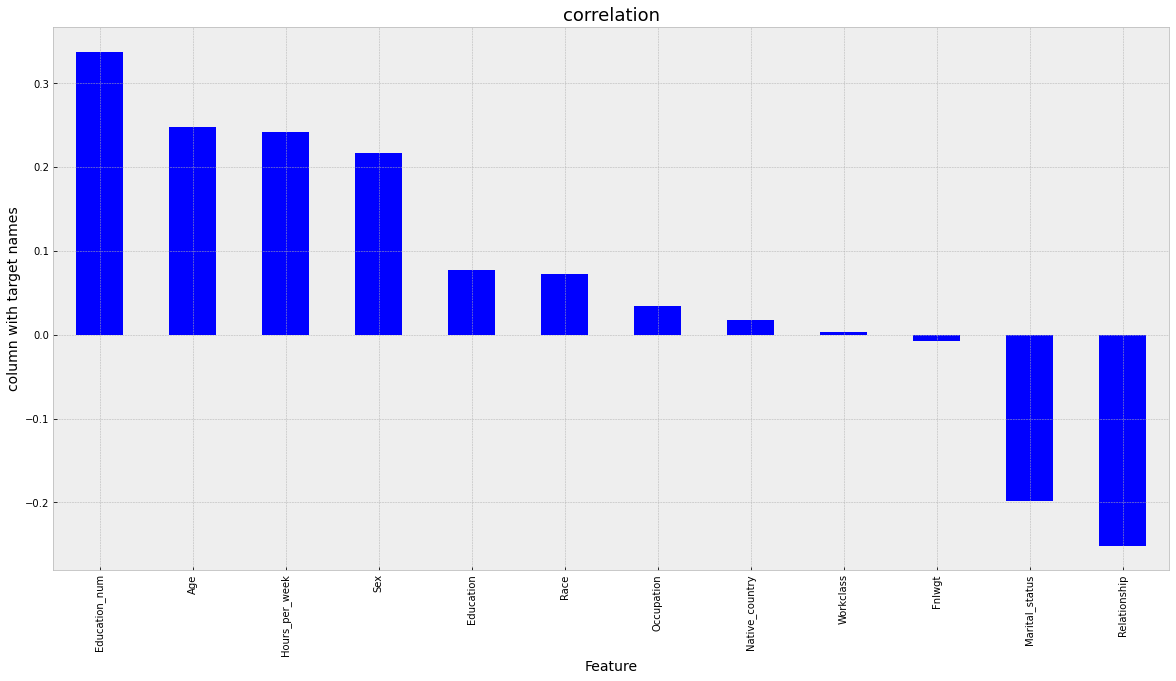

In [669]:
plt.figure(figsize=(20,10))
df_new.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Workclass and Fnlwgt is very less correlated with target column.

# Seprating features and label

In [671]:
x = df.drop("Income", axis=1)
y = df["Income"]

In [672]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,5,83311,8,13,2,3,0,4,1,13,38
1,38,3,215646,10,9,0,5,1,4,1,40,38
2,53,3,234721,1,7,2,5,0,2,1,40,38
3,28,3,338409,8,13,2,9,5,2,0,40,4
4,37,3,284582,11,14,2,3,5,4,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,6,12,2,12,5,4,0,38,38
32556,40,3,154374,10,9,2,6,0,4,1,40,38
32557,58,3,151910,10,9,6,0,4,4,0,40,38
32558,22,3,201490,10,9,4,0,3,4,1,20,38


In [673]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 31440, dtype: int32

In [674]:
x.shape

(31440, 12)

In [675]:
y.shape

(31440,)

# Feature Scaling using Standard Scalarization

In [676]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.874695,1.722237,-1.077607,-0.348082,1.154149,-0.403322,-0.784437,-0.903164,0.391351,0.706601,-2.425021,0.254034
1,-0.025698,-0.080414,0.324098,0.246006,-0.459837,-1.732719,-0.282484,-0.282023,0.391351,0.706601,-0.008690,0.254034
2,1.099794,-0.080414,0.526142,-2.427393,-1.266831,-0.403322,-0.282484,-0.903164,-1.969371,0.706601,-0.008690,0.254034
3,-0.776026,-0.080414,1.624415,-0.348082,1.154149,-0.403322,0.721421,2.202542,-1.969371,-1.415226,-0.008690,-5.456609
4,-0.100731,-0.080414,1.054274,0.543051,1.557646,-0.403322,-0.784437,2.202542,0.391351,-1.415226,-0.008690,0.254034
...,...,...,...,...,...,...,...,...,...,...,...,...
31435,-0.851059,-0.080414,0.765322,-0.942171,0.750653,-0.403322,1.474351,2.202542,0.391351,-1.415226,-0.187678,0.254034
31436,0.124367,-0.080414,-0.324901,0.246006,-0.459837,-0.403322,-0.031508,-0.903164,0.391351,0.706601,-0.008690,0.254034
31437,1.474957,-0.080414,-0.351000,0.246006,-0.459837,2.255471,-1.537366,1.581401,0.391351,-1.415226,-0.008690,0.254034
31438,-1.226223,-0.080414,0.174156,0.246006,-0.459837,0.926075,-1.537366,0.960260,0.391351,0.706601,-1.798565,0.254034


We have scaled the data using standard scalarization method to overcome the issue of biasness we have use standard scaler which will convert dataset into mean=0 and std=1

Now we check for the multicolinearity for this we use Variance Inflation factor(VIF) method

# Checking for multicolinearity

In [677]:
# Find Varience Inflation Factor (VIF) in each scaled column above.

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


vif = pd.DataFrame()

vif['VIF values'] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.165522,Age
1,1.008236,Workclass
2,1.011822,Fnlwgt
3,1.156545,Education
4,1.194536,Education_num
5,1.137977,Marital_status
6,1.016506,Occupation
7,1.686946,Relationship
8,1.033481,Race
9,1.562996,Sex


if vif value is greater than 10 than we can say that multicolinearity is present in the dataset but here we can see that vif value for each of the columns is less than 10 so multicolinearirty is not present in the dataset. so there is no multicolinearity present in the dataset.

# Oversampling method for balancing of the data set

In [678]:
#Checking value count of target column
y.value_counts()

0    23834
1     7606
Name: Income, dtype: int64

In [679]:
#oversampling the data
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [680]:
#Checking value count of target column
y.value_counts()

0    23834
1    23834
Name: Income, dtype: int64

Here we can see that both 0 & 1 has equal number of values we use this to prevent the biaseness in the dataset

# Modeling 

### Finding Best Random State and Accuracy:

In [681]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [683]:
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = RandomForestClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8881896370883156  on Random_state  7


### Creating train_test split

In [690]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Importing Classification Algorithms

In [692]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

Let try different different classification algorithms

### DecisionTree Classifier

In [785]:
#checking accuracy for DecisionTreeclassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train, y_train)
predDTC=DTC.predict(x_test)
print('Accuracy Score',accuracy_score(y_test, predDTC))
print('Confusion Matrix',confusion_matrix(y_test, predDTC))
print('Classification Report',classification_report(y_test,predDTC))

Accuracy Score 0.8321096426823299
Confusion Matrix [[5988 1182]
 [1219 5912]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.84      0.83      7170
           1       0.83      0.83      0.83      7131

    accuracy                           0.83     14301
   macro avg       0.83      0.83      0.83     14301
weighted avg       0.83      0.83      0.83     14301



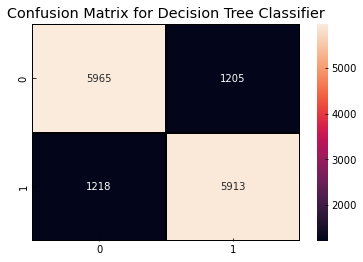

In [731]:
cm = confusion_matrix(y_test, predDTC)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f") 
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### RandomForestClassifier

In [712]:
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC=RFC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predRFC))
print('Confusion Matrix:',confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

Accuracy Score: 0.8872806097475701
Confusion Matrix: [[6240  930]
 [ 682 6449]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7170
           1       0.87      0.90      0.89      7131

    accuracy                           0.89     14301
   macro avg       0.89      0.89      0.89     14301
weighted avg       0.89      0.89      0.89     14301



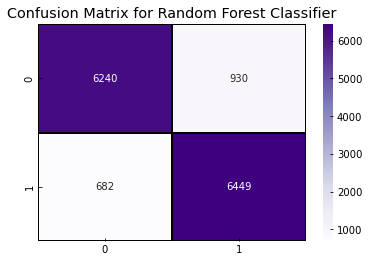

In [714]:
cm = confusion_matrix(y_test, predRFC)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", cmap="Purples") 
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

### SupportVectorClassifier

In [715]:
#checking accuracy for support vector machine classifier

svc=SVC()
svc.fit(x_train,y_train)
predsvc= svc.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predsvc))
print('Confusion Matrix', confusion_matrix(y_test,predsvc))
print('Classification Report', classification_report(y_test,predsvc))

Accuracy Score 0.8232291448150479
Confusion Matrix [[5392 1778]
 [ 750 6381]]
Classification Report               precision    recall  f1-score   support

           0       0.88      0.75      0.81      7170
           1       0.78      0.89      0.83      7131

    accuracy                           0.82     14301
   macro avg       0.83      0.82      0.82     14301
weighted avg       0.83      0.82      0.82     14301



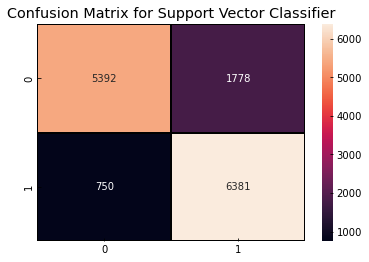

In [732]:
cm = confusion_matrix(y_test, predsvc)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f") 
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

### K-Neighbor Classifier

In [721]:
#checking accuracy for support k-Neighbors classifier

KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN= KNN.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predKNN))
print('Confusion Matrix', confusion_matrix(y_test,predKNN))
print('Classification Report', classification_report(y_test,predKNN))

Accuracy Score 0.8404307391091532
Confusion Matrix [[5430 1740]
 [ 542 6589]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.76      0.83      7170
           1       0.79      0.92      0.85      7131

    accuracy                           0.84     14301
   macro avg       0.85      0.84      0.84     14301
weighted avg       0.85      0.84      0.84     14301



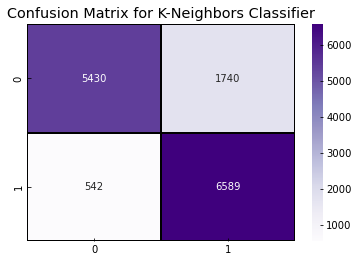

In [726]:
cm = confusion_matrix(y_test, predKNN)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", cmap="Purples") 
plt.title('Confusion Matrix for K-Neighbors Classifier')
plt.show()

### Gradient Boosting Classifier

In [723]:
#checking accuracy for gradient boosting classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predGB))
print('Confusion Matrix', confusion_matrix(y_test,predGB))
print('Classification Report', classification_report(y_test,predGB))

Accuracy Score 0.8539962240402769
Confusion Matrix [[5832 1338]
 [ 750 6381]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.81      0.85      7170
           1       0.83      0.89      0.86      7131

    accuracy                           0.85     14301
   macro avg       0.86      0.85      0.85     14301
weighted avg       0.86      0.85      0.85     14301



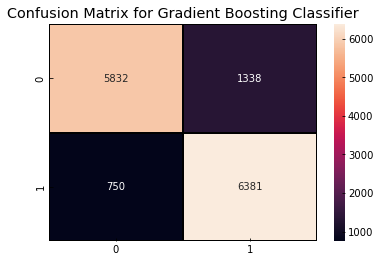

In [733]:
cm = confusion_matrix(y_test, predGB)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f") 
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

### Logistic Regression

In [729]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print('Accuracy Score',accuracy_score(y_test, predLR))
print('Confusion Matrix',confusion_matrix(y_test, predLR))
print('Classification Report',classification_report(y_test,predLR))

Accuracy Score 0.749108453954269
Confusion Matrix [[5200 1970]
 [1618 5513]]
Classification Report               precision    recall  f1-score   support

           0       0.76      0.73      0.74      7170
           1       0.74      0.77      0.75      7131

    accuracy                           0.75     14301
   macro avg       0.75      0.75      0.75     14301
weighted avg       0.75      0.75      0.75     14301



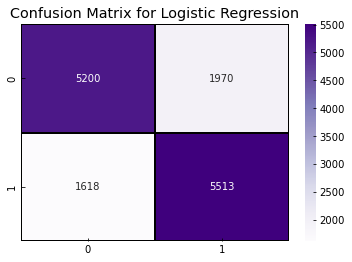

In [735]:
cm = confusion_matrix(y_test, predLR)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", cmap="Purples") 
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

### AdaBoost Classifier

In [737]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train, y_train)
predABC=ABC.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predABC))
print('Confusion Matrix', confusion_matrix(y_test,predABC))
print('Classification Report', classification_report(y_test,predABC))

Accuracy Score 0.8378435074470316
Confusion Matrix [[5758 1412]
 [ 907 6224]]
Classification Report               precision    recall  f1-score   support

           0       0.86      0.80      0.83      7170
           1       0.82      0.87      0.84      7131

    accuracy                           0.84     14301
   macro avg       0.84      0.84      0.84     14301
weighted avg       0.84      0.84      0.84     14301



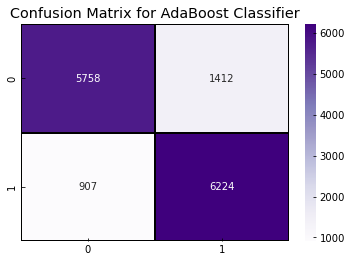

In [739]:
cm = confusion_matrix(y_test, predABC)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f",cmap="Purples" ) 
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

### Bagging Classifier

In [740]:
#checking accuracy for Bagging classifier

BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC= BC.predict(x_test)
print('Accuracy Score', accuracy_score(y_test,predBC))
print('Confusion Matrix', confusion_matrix(y_test,predBC))
print('Classification Report', classification_report(y_test,predBC))

Accuracy Score 0.8706384168939235
Confusion Matrix [[6278  892]
 [ 958 6173]]
Classification Report               precision    recall  f1-score   support

           0       0.87      0.88      0.87      7170
           1       0.87      0.87      0.87      7131

    accuracy                           0.87     14301
   macro avg       0.87      0.87      0.87     14301
weighted avg       0.87      0.87      0.87     14301



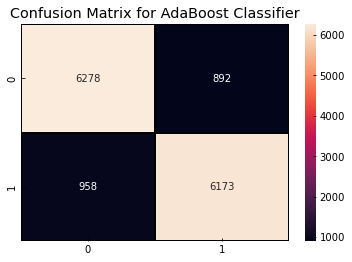

In [741]:
cm = confusion_matrix(y_test, predBC)
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f" ) 
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

# Cross-validation score 

In [742]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Predict using logistic regression
pred_lr = LR.predict(x_test)

# Calculate the accuracy score
lss = accuracy_score(y_test, pred_lr)

# Perform cross-validation for different folds
for j in range(2, 15):
    # Calculate cross-validation scores
    cv_scores = cross_val_score(LR, x, y, cv=j)
    mean_cv_score = cv_scores.mean()
    
    # Display the results
    print('At cv:', j)
    print('Cross-validation score is:', mean_cv_score * 100)
    print('Accuracy score is:', lss * 100)
    print('\n')

At cv: 2
Cross-validation score is: 74.87203155156499
Accuracy score is: 74.91084539542689


At cv: 3
Cross-validation score is: 74.85106088477274
Accuracy score is: 74.91084539542689


At cv: 4
Cross-validation score is: 74.85734664764622
Accuracy score is: 74.91084539542689


At cv: 5
Cross-validation score is: 74.8699447764185
Accuracy score is: 74.91084539542689


At cv: 6
Cross-validation score is: 74.84477560671714
Accuracy score is: 74.91084539542689


At cv: 7
Cross-validation score is: 74.84478196668528
Accuracy score is: 74.91084539542689


At cv: 8
Cross-validation score is: 74.83638546403671
Accuracy score is: 74.91084539542689


At cv: 9
Cross-validation score is: 74.84270121800942
Accuracy score is: 74.91084539542689


At cv: 10
Cross-validation score is: 74.8762482767023
Accuracy score is: 74.91084539542689


At cv: 11
Cross-validation score is: 74.86158033403282
Accuracy score is: 74.91084539542689


At cv: 12
Cross-validation score is: 74.8196162676448
Accuracy score i

At cv: 10


Cross-validation score is: 74.8762482767023


Accuracy score is: 74.91084539542689

#### CV for Logistic Regression

In [778]:
#using k-fold cross validation for Logistic Regression 
cvscore=cross_val_score(LR,x,y,cv=10)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test,predLR) - cvscore.mean()))

[0.73295574 0.74910845 0.75351374 0.74323474 0.75519194 0.74847913
 0.74302496 0.75456262 0.75660932 0.75094419]
0.748762482767023
Difference between Accuracy score and cross validation score is - 0.00034597118724599696


#### CV for DecisionTreeClassifier

In [779]:
#using k-fold cross validation for decision tree classifier 
cvscore=cross_val_score(DTC,x,y,cv=10)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test,predDTC) - cvscore.mean()))

[0.74638137 0.74847913 0.75183554 0.85525488 0.87371512 0.87937906
 0.88042794 0.88777009 0.87515736 0.87305917]
0.8371459663632008
Difference between Accuracy score and cross validation score is - 0.006574677642132376


#### CV for SupportVectorClassifier

In [783]:
#using k-fold cross validation for support vector classifier 
cvscore=cross_val_score(svc,x,y,cv=10)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test,predsvc) - cvscore.mean()))

[0.80952381 0.81036291 0.81770506 0.82106146 0.82756451 0.83595553
 0.82315922 0.82966226 0.83067562 0.83822912]
0.8243899497533442
Difference between Accuracy score and cross validation score is - 0.0011608049382962893


#### CV for k-Neighbour Classifier

In [776]:
#using k-fold cross validation for k-Neighbour classifier 
cvscore=cross_val_score(KNN,x,y,cv=10)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test,predKNN) - cvscore.mean()))

[0.823369   0.82567653 0.83092091 0.84875184 0.85945039 0.86175792
 0.85945039 0.85840151 0.86676458 0.86277801]
0.8497321070399281
Difference between Accuracy score and cross validation score is - 0.009301367930774851


#### CV for RandomForestClassifier

In [780]:
#using k-fold cross validation for Random Forest classifier 
cvscore=cross_val_score(RFC,x,y,cv=10)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test,predRFC) - cvscore.mean()))

[0.79882526 0.80218167 0.81749528 0.89658066 0.92091462 0.92175372
 0.92741766 0.93035452 0.92194713 0.92362568]
0.8861096197358378
Difference between Accuracy score and cross validation score is - 0.0011709900117322647


#### CV for GradientBoosting Classifier

In [781]:
#using k-fold cross validation for Gradient Boosting classifier 
cvscore=cross_val_score(GB,x,y,cv=10)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test,predGB) - cvscore.mean()))

[0.80385987 0.80260122 0.80910426 0.85630375 0.87413468 0.87833019
 0.87413468 0.87770086 0.87347881 0.87326899]
0.8522917295531129
Difference between Accuracy score and cross validation score is - 0.0017044944871639212


#### Cv for Adaboost classifier

In [782]:
#using k-fold cross validation for Adaboost classifier 
cvscore=cross_val_score(ABC,x,y,cv=10)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test,predABC) - cvscore.mean()))

[0.80092301 0.79882526 0.80029369 0.84434655 0.85357667 0.85609398
 0.86007971 0.8558842  0.84704154 0.84892992]
0.8365994539849915
Difference between Accuracy score and cross validation score is - 0.001244053462040151


#### CV for Bagging classifier

In [760]:
#using k-fold cross validation for Bagging classifier 
cvscore=cross_val_score(BC,x,y,cv=10)
print(cvscore)
print(cvscore.mean())
print('Difference between Accuracy score and cross validation score is -',abs(accuracy_score(y_test,predBC) - cvscore.mean()))

[0.76903713 0.7770086  0.78581917 0.89112649 0.90832809 0.91147472
 0.91608978 0.92028529 0.91082669 0.91796055]
0.8707956531831963
Difference between Accuracy score and cross validation score is - 0.00015723628927277744


# Selection for the final model 

After trying different different classification model here we reach at the conclusion that RandomForestClassifier is our final model because when we have applied the RandomForestClassifier we got an accuracy of 0.8872806097475701 and to over come overfitting and underfitting issue we use cross validation and get cross validation score of 0.8861096197358378 and we find Difference between Accuracy score and cross validation score that is equal to 0.0011709900117322647. so we select that model as our final model which has higher accuracy score and higher cross validation score and has lowest difference between between accuracy score and cross validation score. here RandomForestClassifier fullfills all our requriment so we select RandomForestClassifier as our final model

# Select RandomForestClassifier as our final model 

# Perform Hyperparmeter Tuning for RandomForestClassifier

In [761]:
from sklearn.model_selection import GridSearchCV

parameter = {'criterion':['gini','entropy'],
             'max_depth': [10,15,20,25],
             'n_estimators':[100,200,300,400],
             'max_features': ["auto","sqrt","log2"]}

In [763]:
GCV=GridSearchCV(RandomForestClassifier(),parameter, cv=10)

In [764]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400]})

In [765]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'auto',
 'n_estimators': 300}

# Final Model

In [767]:
# Define and train the RandomForestClassifier
final_model = RandomForestClassifier(criterion='gini', max_depth=25, n_estimators=300, max_features='auto')
final_model.fit(x_train, y_train)

# Make predictions
pred = final_model.predict(x_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, pred)
print('Accuracy:', accuracy * 100)

Accuracy: 88.728060974757


Here we get the accuracy of 88.72% 

# Auc-Roc curve

In [768]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

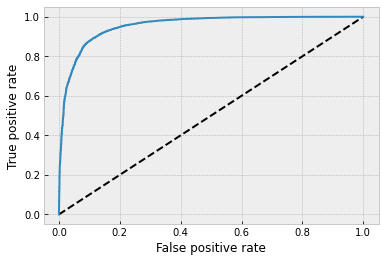

Auc score:
 0.8873613881050912


In [769]:
y_pred_prob=final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()
auc_score=roc_auc_score(y_test, final_model.predict(x_test))
print('Auc score:' '\n', auc_score)

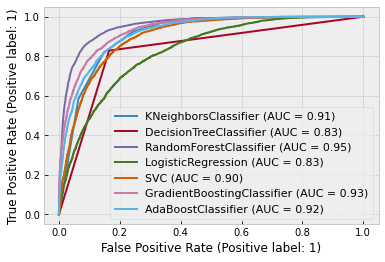

In [786]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 


disp = plot_roc_curve(KNN,x_test,y_test)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)     # ax_=Axes with confusion matrix
plot_roc_curve(RFC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# Saving best model

In [787]:
import joblib

joblib.dump(final_model, 'census_income_project.pkl')

['census_income_project.pkl']

# Predicting save model

In [789]:
model=joblib.load('census_income_project.pkl')

#Predict

prediction = model.predict(x_test)

prediction

array([0, 1, 1, ..., 0, 0, 1])

In [790]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
14296,0,1
14297,1,1
14298,0,1
14299,0,0


# Conclusion

Here we can see that the predicted values and original values are almost similiar so our model is working fine. RandomForestClassifier is wroking very well here